# Predicting the final grade of a student

### [Link to dataset](https://archive.ics.uci.edu/ml/datasets/student+performance)

### Citation:

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.
[Web Link]

### Import the relevant modules

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

In [3]:
student = pd.read_csv('data/student_data/student-mat.csv', sep=';')
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Some basic analysis

In [4]:
print('Total number of students:',len(student))

Total number of students: 395


## Checking the final grade

In [5]:
student['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

### Grades according to the number of students who scored them

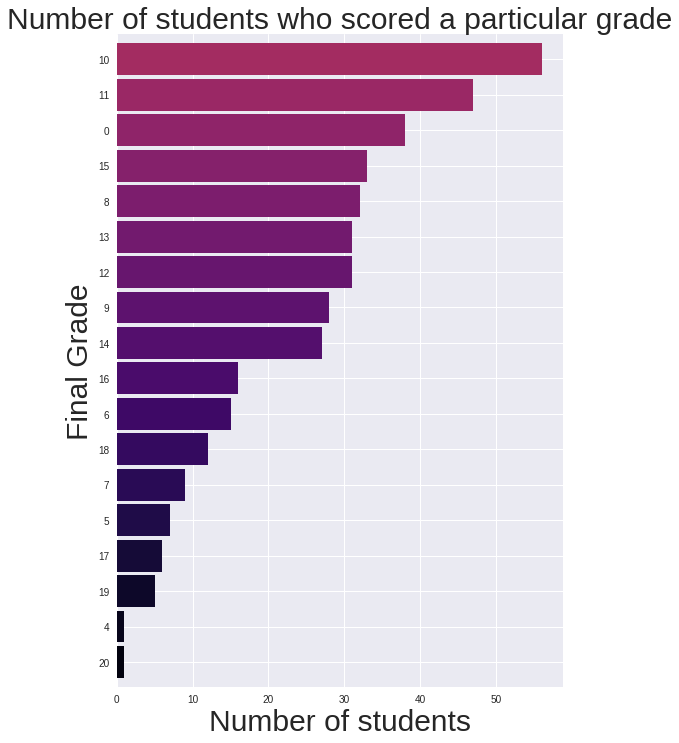

In [6]:
plt.subplots(figsize=(8,12))
grade_counts = student['G3'].value_counts().sort_values().plot.barh(width=.9,color=sns.color_palette('inferno',40))
grade_counts.axes.set_title('Number of students who scored a particular grade',fontsize=30)
grade_counts.set_xlabel('Number of students', fontsize=30)
grade_counts.set_ylabel('Final Grade', fontsize=30)
plt.show()



This plot does not tell us much. What we should really plot is the distribution of grade.



# Final grade distribution

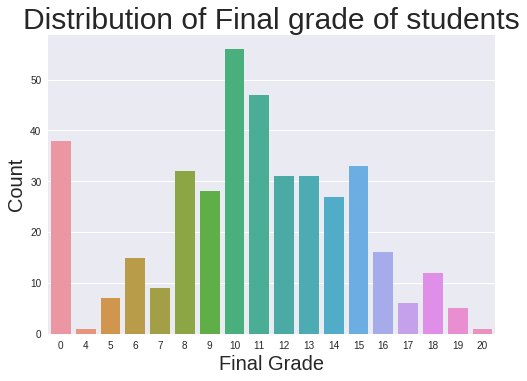

In [7]:
b = sns.countplot(student['G3'])
b.axes.set_title('Distribution of Final grade of students', fontsize = 30)
b.set_xlabel('Final Grade', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
sns.plt.show()

## Hmmmmm!

Something seems off here. Apart from the high number of students scoring 0, the distribution is normal as expected.
Maybe the value 0 is used in place of null. Or maybe the students who did not appear for the exam, or were not allowed to sit for the exam due to some reason are marked as 0. We cannot be sure. Let us check the table for null values

In [8]:
student.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

#### None of the table has null values so maybe it is not null after all

## Next let us take a look at the gender variable

In [9]:
male_studs = len(student[student['sex'] == 'M'])
female_studs = len(student[student['sex'] == 'F'])
print('Number of male students:',male_studs)
print('Number of female students:',female_studs)

Number of male students: 187
Number of female students: 208


## Checking the distribution of Age along with gender

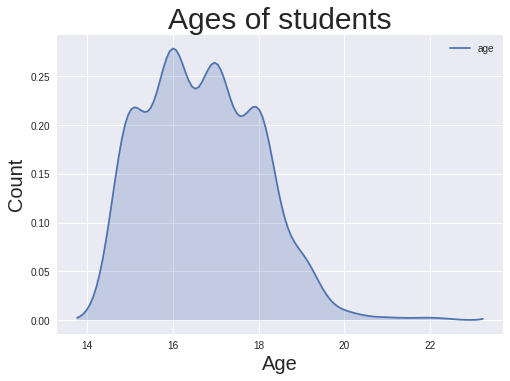

In [10]:
b = sns.kdeplot(student['age'], shade=True)
b.axes.set_title('Ages of students', fontsize = 30)
b.set_xlabel('Age', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
sns.plt.show()

### Histogram might be more useful to compare different ages

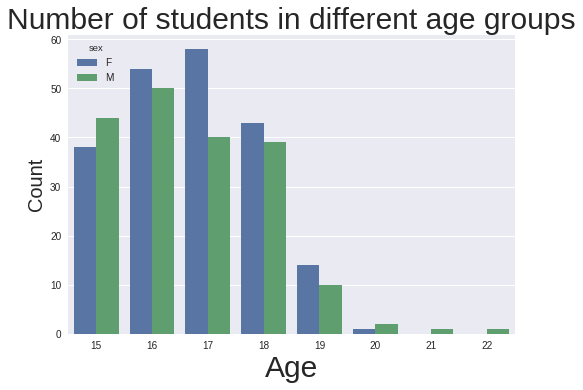

In [11]:
b = sns.countplot('age',hue='sex', data=student)
b.axes.set_title('Number of students in different age groups',fontsize=30)
b.set_xlabel("Age",fontsize=30)
b.set_ylabel("Count",fontsize=20)
sns.plt.show()

The ages seem to be ranging from 15 - 19. The students above that age may not necessarily be outliers but students with year drops.

## Does age have anything to do with the final grade?

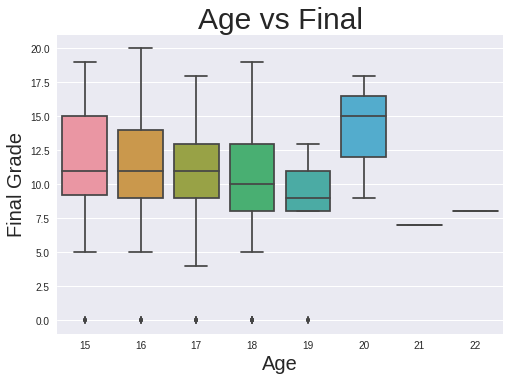

In [12]:
b = sns.boxplot(x='age', y='G3', data=student)
b.axes.set_title('Age vs Final', fontsize = 30)
b.set_xlabel('Age', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
sns.plt.show()

### Plotting the distribution rather than statistics would help us better understand the data

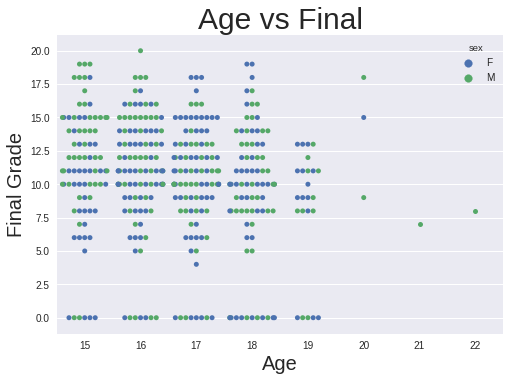

In [13]:
b = sns.swarmplot(x='age', y='G3',hue='sex', data=student)
b.axes.set_title('Age vs Final', fontsize = 30)
b.set_xlabel('Age', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

We see that age 20 has only 3 data points hence the inconsistency in statistics. Otherwise there seems to be no clear relation of age or gender with final grade

## Count of students from urban and rural areas

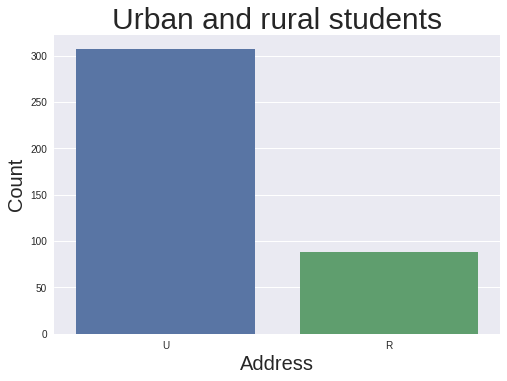

In [14]:
b = sns.countplot(student['address'])
b.axes.set_title('Urban and rural students', fontsize = 30)
b.set_xlabel('Address', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

## Most students are from urban ares, but do urban students perform better than rurual students?

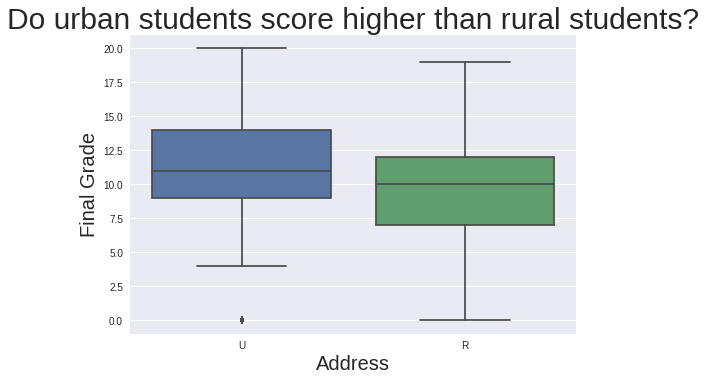

In [15]:
b = sns.boxplot(x='address', y='G3', data=student)
b.axes.set_title('Do urban students score higher than rural students?', fontsize = 30)
b.set_xlabel('Address', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

The graph shows that on average rural students don't have very high scores but that can also be due to the fact that there are more urban students than rural students, as shown from the distribution graph below

## Other features

It might not be wise to analyse every feature so I will find the features most correlated to the final grade and spend more time on them. But before doing that, I want to analyse one feature I find interesting. Reason to attend this school.

## Reason to choose this school

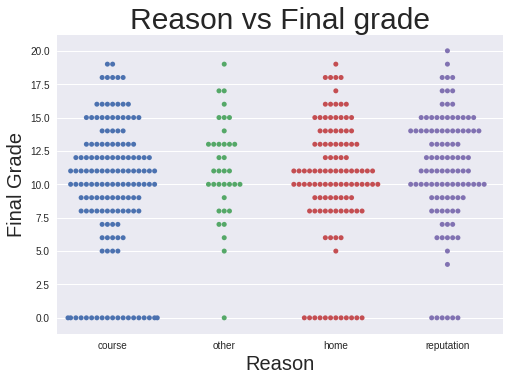

In [35]:
b = sns.swarmplot(x='reason', y='G3', data=student)
b.axes.set_title('Reason vs Final grade', fontsize = 30)
b.set_xlabel('Reason', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

## Correlation

In [15]:
# finding the correlation between features and final grade
# negative correlation indicates that
# as that variable increases, the final grade decreases

# Note: This correlation is only between numeric values
student.corr()['G3'].sort_values()

failures     -0.360415
age          -0.161579
goout        -0.132791
traveltime   -0.117142
health       -0.061335
Dalc         -0.054660
Walc         -0.051939
freetime      0.011307
absences      0.034247
famrel        0.051363
studytime     0.097820
Fedu          0.152457
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

In [16]:
# if we want to use the categorical values as well
# we need to encode them

# One hot encoding is a process by which 
# categorical variables are converted into a form 
# that could be provided to ML algorithms 
# to do a better job in prediction.

# Select only categorical variables
category_df = student.select_dtypes(include=['object'])

# One hot encode the variables
dummy_df = pd.get_dummies(category_df)

# Put the grade back in the dataframe
# creates a new column G3 in the dummy_df
dummy_df['G3'] = student['G3']

# Find correlations with grade
dummy_df.corr()['G3'].sort_values()

higher_no           -0.182465
romantic_yes        -0.129970
Mjob_at_home        -0.115634
address_R           -0.105756
sex_F               -0.103456
paid_no             -0.101996
reason_course       -0.098950
internet_no         -0.098483
Mjob_other          -0.096477
guardian_other      -0.087774
schoolsup_yes       -0.082788
famsize_GT3         -0.081407
Pstatus_T           -0.058009
Fjob_other          -0.053483
nursery_no          -0.051568
school_MS           -0.045017
famsup_yes          -0.039157
reason_home         -0.021359
Fjob_services       -0.016108
activities_no       -0.016100
Fjob_at_home        -0.013385
activities_yes       0.016100
guardian_mother      0.022338
guardian_father      0.032493
famsup_no            0.039157
school_GP            0.045017
nursery_yes          0.051568
reason_other         0.052008
Fjob_health          0.057111
Mjob_teacher         0.057712
Pstatus_A            0.058009
Mjob_services        0.078429
famsize_LE3          0.081407
schoolsup_

In [17]:
# selecting the most correlated values and dropping the others
labels = student['G3']

# drop the school and grade columns
student = student.drop(['school', 'G1', 'G2'], axis='columns')
    
# One-Hot Encoding of Categorical Variables
student = pd.get_dummies(student)
    
# Find correlations with the Grade
most_correlated = student.corr().abs()['G3'].sort_values(ascending=False)   

# Maintain the top 8 most correlation features with Grade
most_correlated = most_correlated[:8]
most_correlated


G3            1.000000
failures      0.360415
Medu          0.217147
higher_yes    0.182465
higher_no     0.182465
age           0.161579
Fedu          0.152457
goout         0.132791
Name: G3, dtype: float64

In [18]:
student = student.loc[:, most_correlated.index]

student.head()

,G3,failures,Medu,higher_yes,higher_no,age,Fedu,goout
0,6,0,4,1,0,18,4,4
1,6,0,1,1,0,17,1,3
2,10,3,1,1,0,15,1,2
3,15,0,4,1,0,15,2,2
4,10,0,3,1,0,16,3,2


In [19]:
print(len(student))
print(student['higher_no'].isnull().sum())

395
0


We see that all values in higher_no are NaNs hence we drop the columnn altogether

In [20]:
student = student.drop(['higher_no'], axis='columns')

In [21]:
student.head()

,G3,failures,Medu,higher_yes,age,Fedu,goout
0,6,0,4,1,18,4,4
1,6,0,1,1,17,1,3
2,10,3,1,1,15,1,2
3,15,0,4,1,15,2,2
4,10,0,3,1,16,3,2


In [22]:
# splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(student, labels, 
                                                        test_size = 0.25,
                                                        random_state=42)

In [23]:
# Calculate mae and rmse
# mae - mean absolute error
# rmse - root mean square error
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

In [24]:
# Naive baseline is the median
median_pred = X_train['G3'].median()
median_preds = [median_pred for _ in range(len(X_test))]
true = X_test['G3']

In [25]:
# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 3.7879
Median Baseline RMSE: 4.8252


In [26]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    X_train = X_train.drop('G3', axis='columns')
    X_test = X_test.drop('G3', axis='columns')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=50)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [27]:
results = evaluate(X_train, X_test, y_train, y_test)
results

,mae,rmse
Linear Regression,3.55577,4.49314
ElasticNet Regression,3.61061,4.57647
Random Forest,3.86215,4.87512
Extra Trees,3.92399,4.99371
SVM,3.58371,4.59575
Gradient Boosted,3.47083,4.36198
Baseline,3.78788,4.82523


In [28]:
# now you can subtract the difference between
# all the models and the baseline to see which one performs the best